# PROJECT => Text Classification Using Naive Bayes

In [1]:
import numpy as np
import pandas as pd
import os
import operator
from string import punctuation
import matplotlib.pyplot as plt
import re
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_recall_fscore_support as score

In [2]:
#stop words
stop_words=["a","the","able","about","data", "about", "above", "above", "across", "after", "afterwards", "again", 
            "against", "all", "almost", "alone", "along", "already", "also","although","always","am","among", "amongst",
            "amoungst", "amount",  "an", "and", "another", "any","anyhow","anyone","anything","anyway", "anywhere", 
            "are", "around", "as",  "at", "back","be","became", "because","become","becomes", "becoming", "been", 
            "before", "beforehand", "behind", "being", "below", "beside", "besides", "between", "beyond", "bill", 
            "both", "bottom","but", "by", "call", "can", "cannot", "cant", "co", "con", "could", "couldnt", "cry", 
            "de", "describe", "detail", "do", "done", "down", "due", "during", "each", "eg", "eight", "either", 
            "eleven","else", "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone", "everything",
            "everywhere", "except", "few", "fifteen", "fify", "fill", "find", "fire", "first", "five", "for", "former", 
            "formerly", "forty", "found", "four", "from", "front", "full", "further", "get", "give", "go", "had", "has", 
            "hasnt", "have", "he", "hence", "her", "here", "hereafter", "hereby", "herein", "hereupon", "hers", 
            "herself", "him", "himself", "his", "how", "however", "hundred", "ie", "if", "in", "inc", "indeed", 
            "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter", "latterly", "least", "less", 
            "ltd", "made", "many", "may", "me", "meanwhile", "might", "mill", "mine", "more", "moreover", "most", 
            "mostly", "move", "much", "must", "my", "myself", "name", "namely", "neither", "never", "nevertheless", 
            "next", "nine", "no", "nobody", "none", "noone", "nor", "not", "nothing", "now", "nowhere", "of", "off", 
            "often", "on", "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our", "ours", "ourselves",
            "out", "over", "own","part", "per", "perhaps", "please", "put", "rather", "re", "same", "see", "seem", 
            "seemed", "seeming", "seems", "serious", "several", "she", "should", "show", "side", "since", "sincere", "six",
            "sixty", "so", "some", "somehow", "someone", "something", "sometime", "sometimes", "somewhere", "still", 
            "such", "system", "take", "ten", "than", "that", "the", "their", "them", "themselves", "then", "thence", 
            "there", "thereafter", "thereby", "therefore", "therein", "thereupon", "these", "they", "thickv", "thin", 
            "third", "this", "those", "though", "three", "through", "throughout", "thru", "thus", "to", "together", "too",
            "top", "toward", "towards", "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us", "very", 
            "via", "was", "we", "well", "were", "what", "whatever", "when", "whence", "whenever", "where", "whereafter", 
            "whereas", "whereby", "wherein", "whereupon", "wherever", "whether", "which", "while", "whither", "who", 
            "whoever", "whole", "whom", "whose", "why", "will", "with", "within", "without", "would", "yet", "you", "your",
            "yours", "yourself", "yourselves", "the"]

In [3]:
# storing special_characters and punctuation marks
specialChar_and_digits = set(punctuation)
for i in range(0,10):
    specialChar_and_digits.add(str(i))
print(specialChar_and_digits)

{'1', '\\', '7', ';', '^', '"', ':', '`', "'", ')', '-', '@', '2', '6', '4', ',', '8', '*', '>', '[', '.', '{', '5', '~', '<', '&', '+', '9', ']', '0', '_', '$', '!', '?', '/', '#', '}', '3', '(', '=', '|', '%'}


In [4]:
all_classes = os.listdir('D:/datasets/20_newsgroups')

In [5]:
all_classes

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [6]:
freq_dict = {}
count = 1

for class_ in all_classes:
    docs = os.listdir("D:/datasets/20_newsgroups" + "/" + class_)
    
    for doc in docs:
        path = 'D:/datasets/20_newsgroups' + "/" + class_ + '/' + doc
        
        with open(path, encoding="latin-1") as file_obj:
            file_data = file_obj.read()
            
            tokens = re.compile('\w+').findall(file_data)
            
            for word in tokens:
                if (word.lower() not in stop_words) and (word.lower().isalpha()) and (len(word.lower())>3):
                    freq_dict[word.lower()] = freq_dict.get(word.lower(),0) + 1
    print(count, "Class done")
    count+=1


1 Class done
2 Class done
3 Class done
4 Class done
5 Class done
6 Class done
7 Class done
8 Class done
9 Class done
10 Class done
11 Class done
12 Class done
13 Class done
14 Class done
15 Class done
16 Class done
17 Class done
18 Class done
19 Class done
20 Class done


In [7]:
freq_dict

{'xref': 6064,
 'cantaloupe': 26048,
 'atheism': 2563,
 'moderated': 58,
 'news': 34309,
 'answers': 913,
 'path': 20369,
 'crabapple': 6235,
 'andrew': 4458,
 'ohio': 15887,
 'state': 18842,
 'magnus': 1340,
 'usenet': 8308,
 'cwru': 2732,
 'agate': 1827,
 'spool': 581,
 'uunet': 5369,
 'pipex': 759,
 'ibmpcug': 109,
 'mantis': 625,
 'mathew': 426,
 'newsgroups': 20404,
 'subject': 21589,
 'atheist': 406,
 'resources': 475,
 'summary': 983,
 'books': 950,
 'addresses': 242,
 'music': 481,
 'related': 712,
 'keywords': 1554,
 'fiction': 148,
 'contacts': 100,
 'message': 21954,
 'date': 20787,
 'expires': 161,
 'followup': 1485,
 'distribution': 4753,
 'world': 5354,
 'organization': 19840,
 'consultants': 92,
 'cambridge': 470,
 'approved': 1322,
 'request': 848,
 'supersedes': 50,
 'lines': 20894,
 'archive': 510,
 'modified': 236,
 'december': 201,
 'version': 2616,
 'organizations': 281,
 'freedom': 713,
 'religion': 5351,
 'foundation': 261,
 'darwin': 2403,
 'fish': 129,
 'bumper

In [8]:
freq_dict = dict(sorted(freq_dict.items(), key=operator.itemgetter(1),reverse=True))
freq_dict

{'news': 34309,
 'cantaloupe': 26048,
 'message': 21954,
 'subject': 21589,
 'lines': 20894,
 'date': 20787,
 'newsgroups': 20404,
 'path': 20369,
 'organization': 19840,
 'state': 18842,
 'ohio': 15887,
 'writes': 14686,
 'article': 13435,
 'comp': 13101,
 'references': 12981,
 'talk': 12308,
 'misc': 11892,
 'sender': 11040,
 'howland': 10981,
 'reston': 10946,
 'people': 10364,
 'like': 10350,
 'just': 9978,
 'university': 9958,
 'posting': 9793,
 'nntp': 9377,
 'know': 9173,
 'host': 8934,
 'think': 8315,
 'usenet': 8308,
 'zaphod': 8302,
 'politics': 7869,
 'windows': 7584,
 'does': 7267,
 'time': 7073,
 'rutgers': 7014,
 'harvard': 6923,
 'near': 6868,
 'good': 6308,
 'crabapple': 6235,
 'xref': 6064,
 'europa': 5448,
 'gtefsd': 5429,
 'uunet': 5369,
 'world': 5354,
 'religion': 5351,
 'make': 5191,
 'christian': 5129,
 'right': 4943,
 'rochester': 4851,
 'distribution': 4753,
 'club': 4617,
 'space': 4544,
 'mail': 4511,
 'andrew': 4458,
 'want': 4442,
 'gatech': 4413,
 'magnesi

## Plotting the word frequency

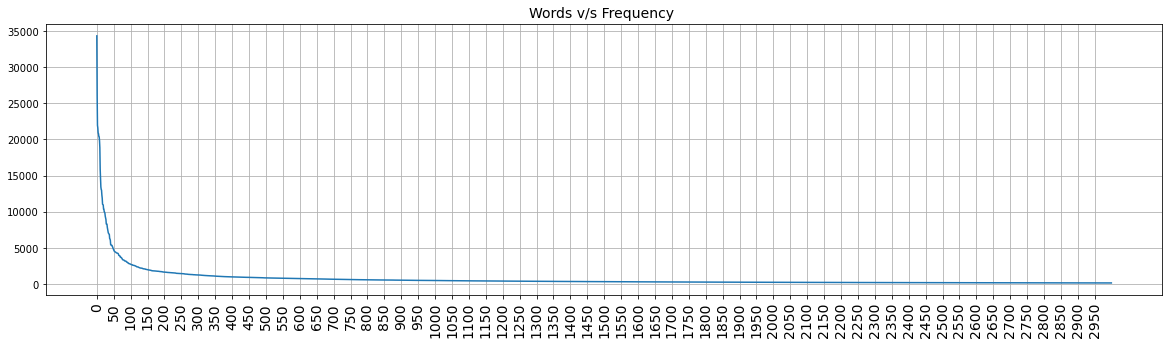

In [9]:
# storing the words ( keys of dictionary) and its frequencies ( values of dictionary) in a array inorder to plot the graph
words = [key for key,val in freq_dict.items()]
frequencies = [val for key,val in freq_dict.items()]

# setting the limit to avoid the least frequencies words
lower_limit=0   
upper_limit=3000    

# defining the figure size for better visualization
plt.figure(figsize=(20, 5))

# plotting the line graph
plt.plot(np.arange(len(words))[lower_limit:upper_limit],frequencies[lower_limit:upper_limit])
plt.title("Words v/s Frequency ",size=14)
plt.xticks(np.arange(lower_limit, upper_limit, 50), rotation=90,size=14)
plt.grid()
plt.show()

In [10]:
# picking the top 3000 words for vocabulary
words = words[0:3000]
frequencies = frequencies[0:3000]

## Building dataset from given documents

In [11]:
dataset = []

class_count=1

for class_ in all_classes:
    # storing the all documents in a list for a particular class
    all_docs = os.listdir("D:/datasets/20_newsgroups"+"/"+class_)
    
    # traversing through each documents of a particular class
    for docs in all_docs:
        
        # initializing all the features of a datapoint with 0
        datapoint = [0]*len(words)
        
        # getting the base path which is common for all documents of a particular class
        path = "D:/datasets/20_newsgroups"+"/"+class_+"/"+docs
        
        # opening the particular document as file object   
        with open(path, encoding = "latin-1") as file_obj:
            
            # reading the document data
            file_data = file_obj.read()
            
            # stroing each words in a list , used re to remove the whitespaces 
            tokens = re.compile('\w+').findall(file_data)
            
            # traversing through each word in token and checking if it is in vocabulary or not
            for word in tokens:
                word = word.lower()
                
                # if the word is in vocabulary then increasing its count by 1 otherwise continue
                if word in words:
                    datapoint[words.index(word)] = datapoint[words.index(word)] + 1
                    
        # appending the class name to target column of the datapoint to which class it belongs
        datapoint.append(class_)
        
        # adding the datapoint to the dataset
        dataset.append(datapoint)
        
    # using print to check the progress during the runtime
    print(class_count, "Class done")
    class_count+=1
print(len(dataset))

1 Class done
2 Class done
3 Class done
4 Class done
5 Class done
6 Class done
7 Class done
8 Class done
9 Class done
10 Class done
11 Class done
12 Class done
13 Class done
14 Class done
15 Class done
16 Class done
17 Class done
18 Class done
19 Class done
20 Class done
19997


In [12]:
words.append("CLASS")

In [13]:
dataframe = pd.DataFrame(dataset, columns = words, index=None)

In [14]:
dataframe

,news,cantaloupe,message,subject,lines,date,newsgroups,path,organization,state,...,albany,northeastern,vram,cacs,clarku,listening,campaign,wearing,ccwf,CLASS
0,4,2,1,1,2,1,1,1,2,2,...,0,0,0,0,0,1,0,0,0,alt.atheism
1,3,2,2,2,1,1,1,1,2,9,...,0,0,0,0,0,0,2,0,0,alt.atheism
2,2,1,1,1,1,2,1,1,1,0,...,0,0,0,0,0,0,0,0,0,alt.atheism
3,1,2,1,1,1,1,1,1,1,3,...,0,0,0,0,0,0,0,0,0,alt.atheism
4,0,2,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,alt.atheism
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19992,2,2,1,1,1,1,1,1,1,3,...,0,0,0,0,0,0,0,0,0,talk.religion.misc
19993,2,2,1,1,1,1,1,1,1,3,...,0,0,0,0,0,0,0,0,0,talk.religion.misc
19994,0,2,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,talk.religion.misc
19995,2,2,1,1,1,1,1,1,1,3,...,0,0,0,0,0,0,0,0,0,talk.religion.misc


In [15]:
# X is features
X = dataframe[dataframe.columns[:-1]].values

In [16]:
# Y is the target class
Y = dataframe["CLASS"]

In [17]:
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size=0.25,random_state=0)

# Using sklearn naive bayes

In [18]:
# creating a classifier object
alg = MultinomialNB()

# fitting the classifier object to training data
alg.fit(X_train, Y_train)

# testing the classifier and storing the predicted Y_pred classes
Y_pred = alg.predict(X_test)

# Generating the classification report and printing the confusion matrix
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

                          precision    recall  f1-score   support

             alt.atheism       0.82      0.82      0.82       233
           comp.graphics       0.83      0.78      0.81       253
 comp.os.ms-windows.misc       0.77      0.88      0.82       249
comp.sys.ibm.pc.hardware       0.65      0.78      0.71       240
   comp.sys.mac.hardware       0.75      0.76      0.75       236
          comp.windows.x       0.91      0.73      0.81       240
            misc.forsale       0.85      0.92      0.88       261
               rec.autos       0.88      0.90      0.89       269
         rec.motorcycles       0.91      0.95      0.93       284
      rec.sport.baseball       0.97      0.93      0.95       248
        rec.sport.hockey       0.92      0.99      0.96       231
               sci.crypt       0.98      0.95      0.97       233
         sci.electronics       0.88      0.85      0.86       244
                 sci.med       0.95      0.78      0.86       256
         

In [19]:
# storing the classification report to comparing it with own multinomial Naive Bayes classifier
report_list_sklearn = classification_report(Y_test,Y_pred).split("\n")
for i in report_list_sklearn:
    if i=="":
        report_list_sklearn.remove(i)
sklearn_classifier_score = []
class_names = []
for i in report_list_sklearn[1:-3]:
    sklearn_classifier_score.append(float(i.split()[3]))
    class_names.append(i.split()[0])

# Implementing Own Naive Bayes Classifier

In [20]:
# fitting training data
def fit(X_train,Y_train):
    # initializing the result dictionary
    result = {}
    
    # initializing the total count of words to 0
    result["total_data"] = 0
    
    # storing the names of all classes by using set()
    class_values = set(Y_train)
    
    # traversing through each class as current_class
    for current_class in class_values:
        
        # initializing the current_class dictionary
        result[current_class] = {}
        
        # getting the data points which belongs to current class by using a boolean array
        current_class_rows = (Y_train == current_class)
        
        # storing the features of current_class data points
        X_train_current = X_train[current_class_rows]
        
        # storing the target class of data points of current_class
        Y_train_current = Y_train[current_class_rows]
        
        # finding the total number of features
        num_features = X_train.shape[1]
        
        # initializing the total count for the current_class to 0
        result[current_class]["total_count"] = 0
        
        # traversing through all features
        for j in range(num_features):
            
            # finding the number of time the jth word appeared in current_class features
            result[current_class][j] = X_train_current[:,j].sum()
            
            # updating the total_count value of that word
            result[current_class]["total_count"] += result[current_class][j]
        # updating the total number of words in all documents
        result["total_data"] += result[current_class]["total_count"]
        
        # using print to check the progress during runtime
        print("#",end="")
        
    # returning the required dictionary
    return result


In [21]:
# finding probablity for a specific class
def probability(dictionary, x, current_class):
    # calculating the log probablities to avoid the final probablities to approaching zero
    # using the multinomial Naive Bayes formula to calucate the probality for a particular class
    output = np.log(dictionary[current_class]["total_count"]) - np.log(dictionary["total_data"])
    
    # finding the total number of features
    num_features = len(x)
    
    # traversing through each feature
    for j in range(num_features):
        xj = x[j]
        # ignoring the features whose value is zero t0 avoid unnecessary calcualtions
        if x[j]==0:
            continue
        # using the multinomial Naive Bayes formula to calucate the probality
        # also implementing the Laplace Correction
        current_class_with_xj = dictionary[current_class][j] + 1
        current_class_total_count = dictionary[current_class]["total_count"] + num_features
        
        # finding the log probablities
        current_xj_prob = np.log(current_class_with_xj) - np.log(current_class_total_count)
        # adding to the intial output value to get the final value
        output += current_xj_prob
    
    # returning the probablity
    return output

In [22]:
# prediction for a single data point
def predictSinglePoint(dictionary,x):
    # storing the class names from the dictionary keys
    classes = dictionary.keys()
    
    # assuming the initial probablity to be a big negative number
    best_p = -1000
    
    # initialising the variable for best predicted class
    best_class = -1
    
    # using a variable so that we can find the class for the first time run in order to get the best class
    first_run = True
    
    # traversing through each classes
    for current_class in classes:
        
        # as one of the keys in dictionary is the total_count to checking if it is then continue
        if (current_class == "total_data"):
            continue
            
        # calling the probablity function to get the probality for the current_class
        p_current_class = probability(dictionary, x, current_class)
        
        # checking if the probablity is best from the previous one, if yes then update it otherwise continue
        if (first_run or p_current_class > best_p):
            
            # updating best_class and probablity values
            best_p = p_current_class
            best_class = current_class
        # changing the value of First run to False
        first_run = False
        
    # returning the best predicted class
    return best_class 

In [23]:
# predicting the classes
def predict(dictionary, X_test):
    """ FUNCTION
            predict :
                Arguments : dictionary (returned from fit function), testing data (X_test)
                Returns   : the predicted classes (Y_pred)
    """
    # initializing the array to store the predicted classes
    Y_pred = []
    
    # using count to check the progress during runtime
    count=1
    
    # traversing through each data point in testing data
    for x in X_test:
        
        # calling the predictSinglePoint function to get the prediction for a sigle data point
        x_class = predictSinglePoint(dictionary,x)
        
        # adding the predicted class to the Y_pred array
        Y_pred.append(x_class)
    
    # returning the predicted classes
    return Y_pred

In [24]:
# Y_ target data
Y_ = dataframe["CLASS"]

# X_ features
X_ = dataframe[dataframe.columns[:-1]].values

# splitting the data into train-test 
X_train_,X_test_,Y_train_,Y_test_ = model_selection.train_test_split(X,Y,test_size=0.25,random_state=0)

In [25]:
# Fitting data
dictionary = fit(X_train_,Y_train_)

####################

In [26]:
# Predicting
Y_pred_ = predict(dictionary,X_test_)

In [27]:
# generating the classification report and printing the confusion matrix
print(classification_report(Y_test_,Y_pred_))
print(confusion_matrix(Y_test_,Y_pred_))

                          precision    recall  f1-score   support

             alt.atheism       0.77      0.87      0.82       233
           comp.graphics       0.78      0.81      0.80       253
 comp.os.ms-windows.misc       0.77      0.86      0.81       249
comp.sys.ibm.pc.hardware       0.71      0.76      0.73       240
   comp.sys.mac.hardware       0.73      0.82      0.78       236
          comp.windows.x       0.93      0.71      0.81       240
            misc.forsale       0.89      0.91      0.90       261
               rec.autos       0.93      0.93      0.93       269
         rec.motorcycles       0.93      0.98      0.95       284
      rec.sport.baseball       0.97      0.98      0.97       248
        rec.sport.hockey       0.97      0.99      0.98       231
               sci.crypt       0.97      0.94      0.96       233
         sci.electronics       0.88      0.89      0.89       244
                 sci.med       0.95      0.82      0.88       256
         

In [28]:
# storing the classification report values in variable for comparing it to Sklearn multinomialNB Classifier
report_list = classification_report(Y_test_,Y_pred_).split("\n")
for i in report_list:
    if i=="":
        report_list.remove(i)
own_classifier_score = []
for i in report_list[1:-3]:
    own_classifier_score.append(float(i.split()[3]))

# Comparison between inbuilt classifier vs my own implementation

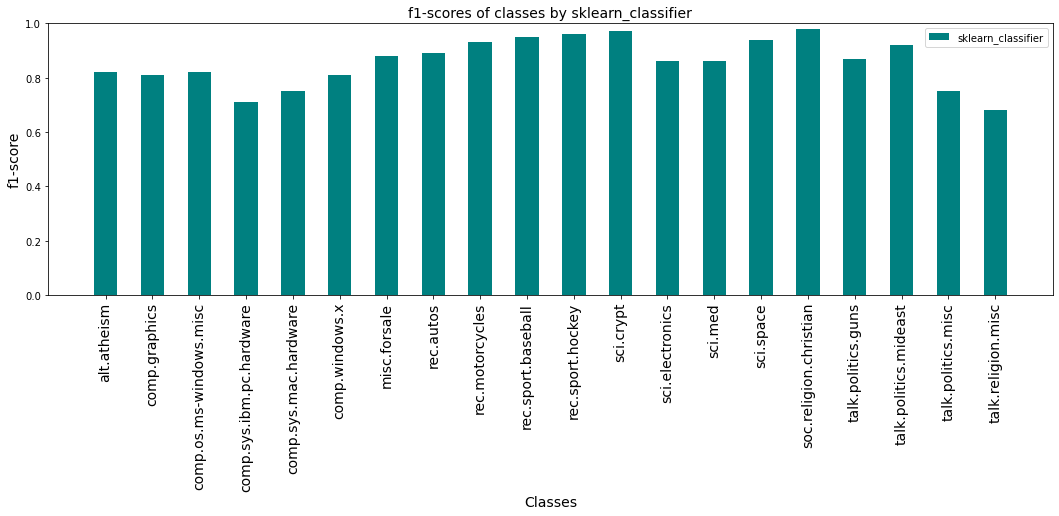

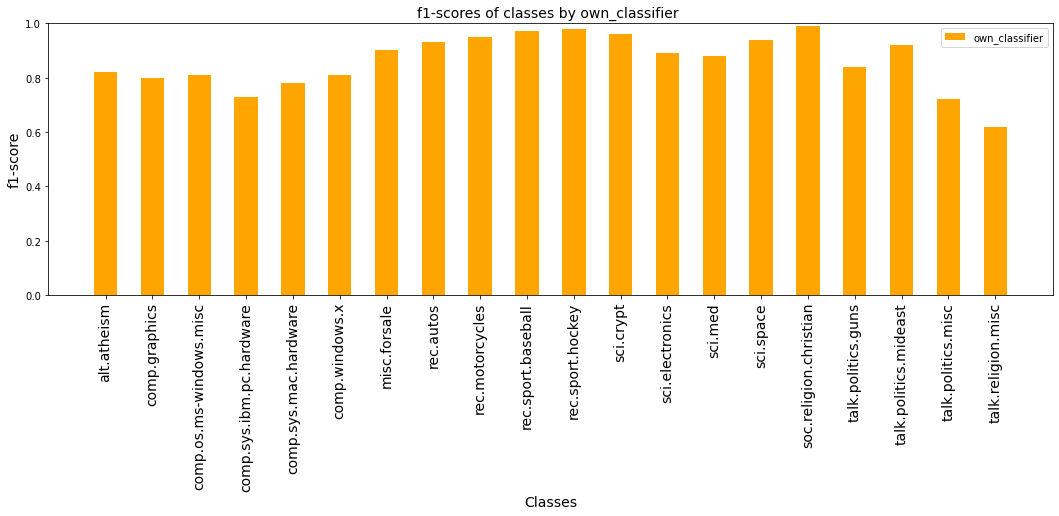

In [29]:
# plotting graphs

# set width of bar
barWidth = 0.5

# Make the plot
plt.subplots(figsize=(18,5))
plt.bar(class_names, sklearn_classifier_score, color="teal", width=barWidth, label='sklearn_classifier')
plt.xlabel("Classes",size=14)
plt.xticks(rotation=90,size=14)
plt.axis((None,None,0,1))
plt.ylabel("f1-score",size=14)
plt.title("f1-scores of classes by sklearn_classifier",size=14)
plt.legend()
plt.show()

# Make the plot
plt.subplots(figsize=(18,5))
plt.bar(class_names, own_classifier_score, color='orange', width=barWidth,label='own_classifier')
plt.xlabel("Classes",size=14)
plt.xticks(rotation=90,size=14)
plt.axis((None,None,0,1))
plt.ylabel("f1-score",size=14)
plt.title("f1-scores of classes by own_classifier ",size=14)
plt.legend()
plt.show()

Overall Acurracy seems to be almost same


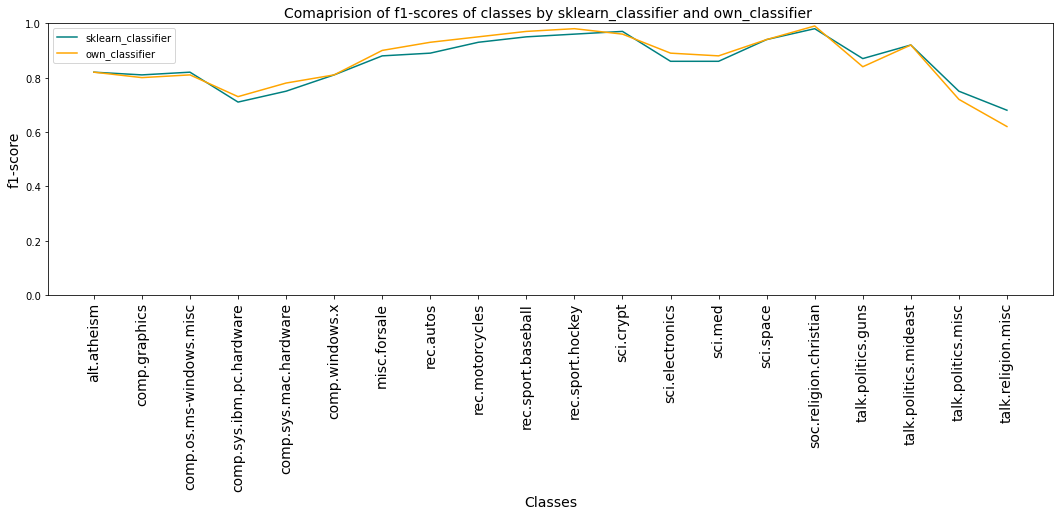

In [30]:
print("Overall Acurracy seems to be almost same")

# Comparing through line graphs
plt.subplots(figsize=(18,5))
plt.plot(class_names, sklearn_classifier_score, color="teal",label='sklearn_classifier')
plt.plot(class_names, own_classifier_score, color='orange',label='own_classifier')
plt.xlabel("Classes",size=14)
plt.xticks(rotation=90,size=14)
plt.axis((None,None,0,1))
plt.ylabel("f1-score",size=14)
plt.title("Comaprision of f1-scores of classes by sklearn_classifier and own_classifier ",size=14)
plt.legend()
plt.show()

# Overall Acurracy seems to be almost same